# Plotly network graphs

https://plotly.com/python/network-graphs/

## 0. Imports

In [1]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "jupyterlab+svg"

import networkx as nx

## 1. Create random data

In [2]:
G = nx.random_geometric_graph(n=200, radius=0.125, seed=42)

### default draw

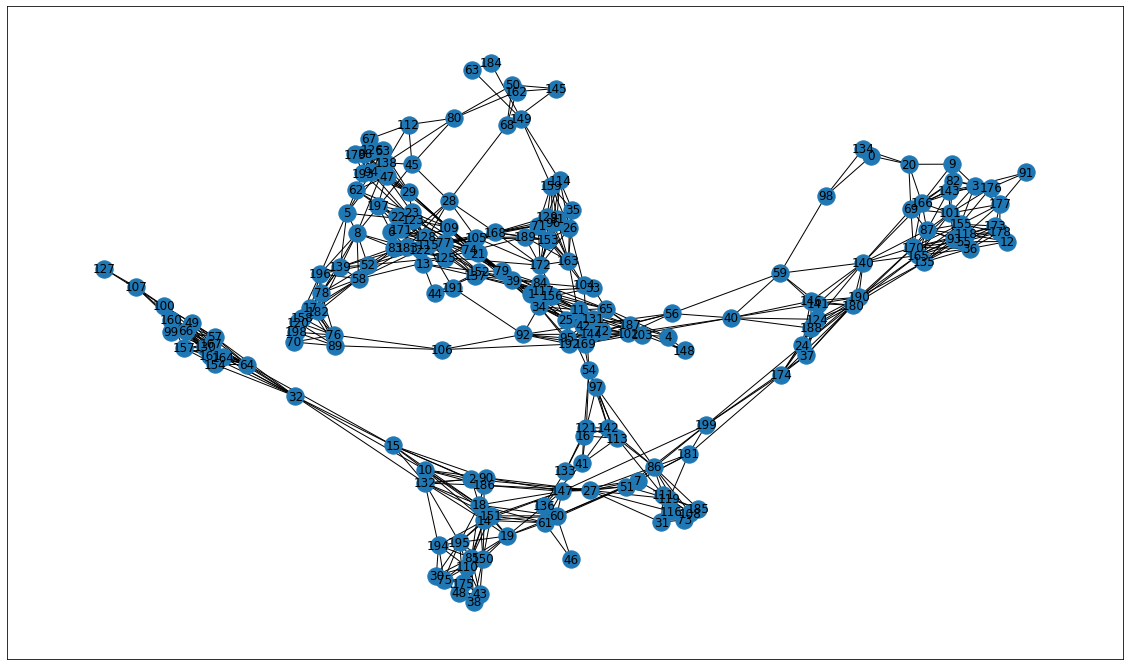

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
nx.draw_networkx(G)

## 2. Create edges and nodes

In [4]:
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_x[0:3]

[0.6394267984578837, 0.7045718362149235, None]

In [5]:
edge_trace = go.Scatter(
    x=edge_x, 
    y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'
)

In [6]:
node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

print(node_x[0], node_y[0])

0.6394267984578837 0.025010755222666936


In [7]:
node_trace = go.Scatter(
    x=node_x,
    y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2
    )
)

## 3. Color Node Points, Add text, change node size

In [8]:
node_adjacencies = []
node_text = []
node_size = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('# of connections: '+str(len(adjacencies[1])))
    node_size.append(len(adjacencies[1]) * 5)

node_trace.marker.color = node_adjacencies
node_trace.text = node_text
node_trace.marker.size = node_size

## 4. Create Network Graph

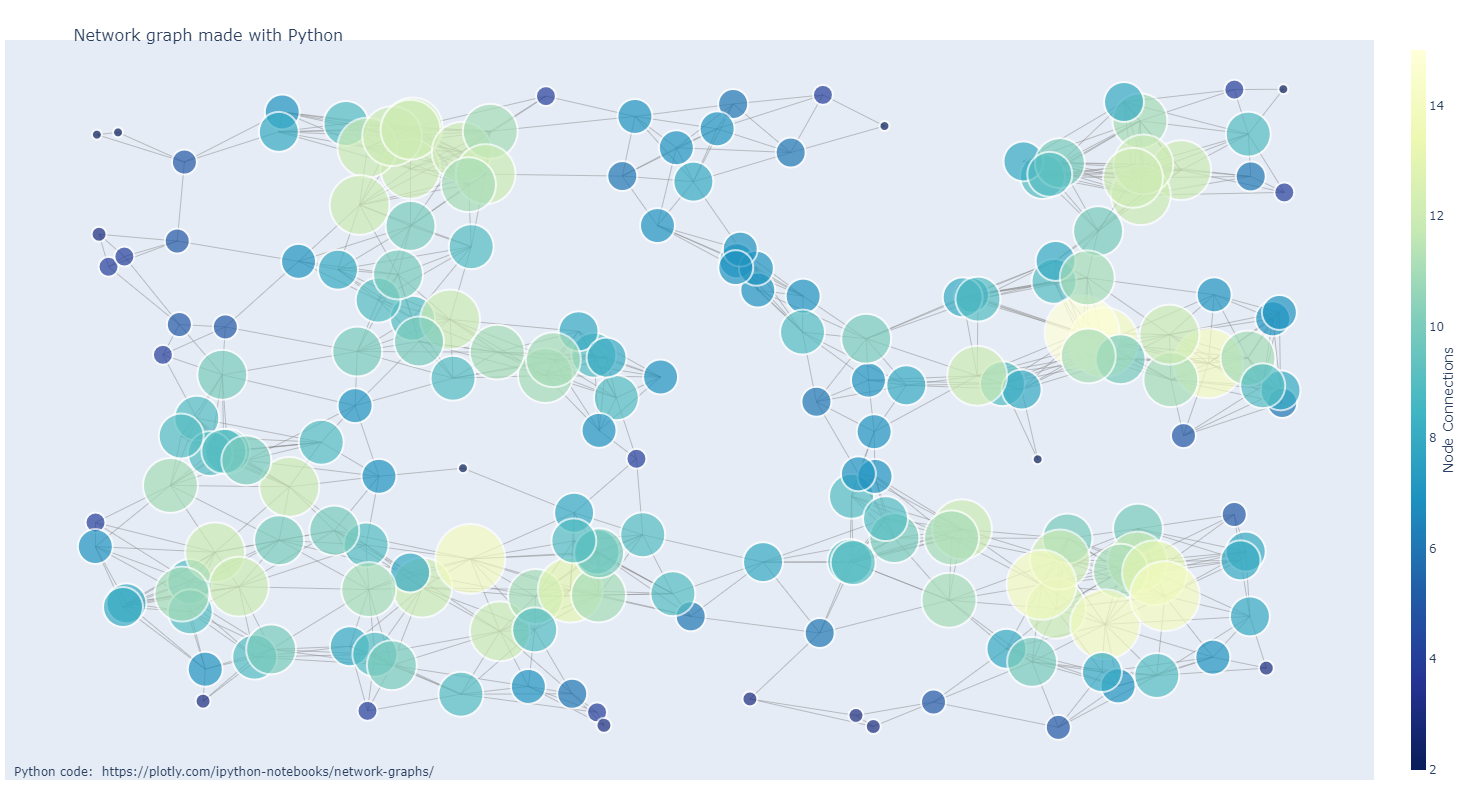

In [9]:
fig = go.Figure(
    data=[edge_trace, node_trace],
    layout=go.Layout(
        title='<br>Network graph made with Python',
        titlefont_size=16,
        showlegend=False,
        hovermode='closest',
        margin=dict(b=20,l=5,r=5,t=40),
        height=800,
        annotations=[ dict(
            text="Python code: <a href='https://plotly.com/ipython-notebooks/network-graphs/'> https://plotly.com/ipython-notebooks/network-graphs/</a>",
            showarrow=False,
            xref="paper", yref="paper",
            x=0.005, y=-0.002 ) ],
        xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
        yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
    )
)
fig.show()